# 自动分拣机器人

功能描述：能够获取虚谷号的摄像头内容，分拣红豆和绿豆，根据识别结果执行不同的动作。

准备工作：摄像头（免驱）、扩展板（推荐"厚物"）、舵机

代码编写：谢作如、林淼焱

In [ ]:
# 应用摄像头的准备工作：导入库
# -*- coding: UTF-8 -*-
import cv2
from IPython import display
from matplotlib import pyplot as plt
import time
%matplotlib inline

几个基本函数

In [ ]:
#函数：显示摄像头图片并且保存为图片文件
def get_showcampic(fname):
    cap = cv2.VideoCapture(0)        # 打开摄像头
    ret, frame = cap.read()       # 读摄像头
    display.clear_output(wait=True) # 设置在一个画面中刷新
    cv2.imwrite(fname,frame)
    plt.imshow(frame[:,:,::-1])
    plt.axis('off') #不显示坐标
    plt.show()
    cap.release()      
    cv2.destroyAllWindows() 
#get_showcampic("test.jpg")

In [ ]:
#函数：处理图片(裁剪，读取像素点的RGB值并取平均)
def get_color(frame):
    step=0
    red=0
    blue=0
    green=0
    print('开始处理')
    high, width, _ = frame.shape
    print('剪裁前行数%d，列数%d' % (high, width))
    # 裁剪坐标为[x0:x1,y0:y1],我们截取图像的中心部分，上下分为五格，取中间那一格
    frame=frame[int(high*4/10):int(high*6/10),int(width*4/10):int(width*6/10)]
    high, width, _ = frame.shape
    print('剪裁后行数%d，列数%d' % (high, width))
    #读取图片中所有像素点的RGB值
    frame1 = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    for i in frame1:
        #i中的数据类型是一整行的像素点[[0,0,0][0,0,0]]
        step+=1
        #读取图片像素点的步长，即多少像素点读取一次，提高效率
        if (step==20):
            for point in i:
            #point中的数据类型是单个像素点
                red+=point[0]
                green+=point[1]
                blue+=point[2]
            step=0
    red=red/len(i)
    green=green/len(i)
    blue=blue/len(i)
    return red,green,blue

### 自动分拣机器人核心代码

功能描述：识别图片中心物体的颜色，如果是白纸，2秒钟拍摄一次，否则根据红色或者绿色的判断，执行舵机转动不同的角度。

装置说明：
    - 舵机接D12；
    - 摄像头下方放置白纸，红豆和绿豆要放在摄像头的中间位置，离摄像头的距离10CM为宜。

In [ ]:
#导入GPIO库，舵机接D12
from xugu import Servo
servo = Servo(12)

In [ ]:
filename = r"test.jpg"
while 1:
    get_showcampic(filename)
    frame = cv2.imread(filename)
    r,g,b=get_color(frame)
    if g+r+b<600:
        if (g>r):
            print("可能是绿豆")
            servo.write_angle(150)
        else:
            print("可能是红豆")
            servo.write_angle(50)
        time.sleep(3)
    print('r:',r)
    print('g:',g)
    #print('b:',b)
    time.sleep(2)

参考运行结果：
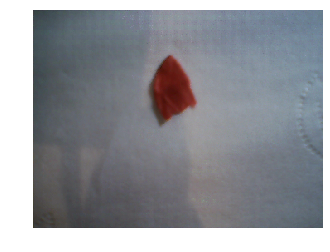

    开始处理
    剪裁前行数480，列数640
    剪裁后行数96，列数128
    可能是红豆